In [95]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import table

%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]


In [96]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])
df.head()

,x,y
0,0.104643,5.465424
1,0.401660,5.406456
2,0.098332,3.588447
3,1.217482,8.192599
4,1.103585,6.339252


In [97]:
def predict(x):
    return 2 * x + 5

In [98]:
y_pred = predict(x)

## RSS

In [99]:
def rss(y, y_pred):
    z = ((y - y_pred)**2).sum()
    return z

In [100]:
print (rss(y, y_pred))


126.87688558038924


In [101]:
print( mean_squared_error(y, y_pred))

1.2687688558038923


## Парная регрессия

In [102]:
def estimate(x, y):

    x_mean = x.mean()
    y_mean = y.mean()
    
    b1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean)**2).sum()
    b0 = y_mean - b1 * x_mean 
    
    return b0, b1

def predict_estimated(x, b0, b1):
    
    return b0 + b1* x


In [103]:
b0, b1 = estimate(x, y)

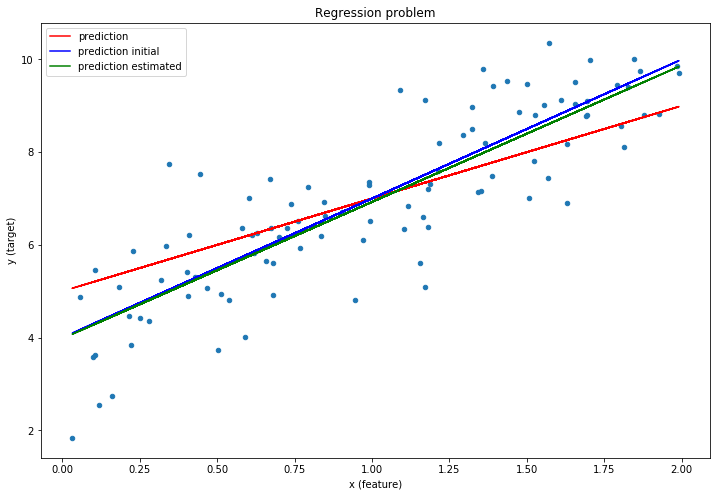

In [104]:
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.plot(x, predict(x), color='red', label='prediction')
plt.plot(x, predict_estimated(x, 4, 3), color='blue', label='prediction initial')
plt.plot(x, predict_estimated(x, b0, b1), color='green', label='prediction estimated')
plt.legend()

## Множественная регрессия

In [111]:
x1 = 2 * np.random.rand(100, 1)
x2 = 5 * np.random.rand(100, 1)

# y = 4 + 3*x_1 + 1*x_2
y2 = 4 + 3 * x1 + x2 + np.random.randn(100, 1)

In [112]:
x = np.hstack([np.ones(x1.shape[0]).reshape(-1, 1), x1, x2])

In [113]:
df1 = pd.DataFrame(np.hstack([x1, x2, y2]), columns=['x1', 'x2', 'y2'])
df1.head()

,x1,x2,y2
0,0.518471,3.516422,7.977237
1,0.868781,2.137110,9.012514
2,0.462426,1.223782,6.670396
3,0.266675,2.640713,6.158633
4,0.293442,2.004733,6.857399


In [114]:
y_pred2 = 2 + 4*x1 + x2

mean_squared_error(y2, y_pred2)

2.7511299148195105

In [115]:
def estimate_w(x, y):
    
    w = la.inv(x.T.dot(x)).dot(x.T).dot(y)
    
    return w

In [ ]:
def predict_estimated(x, w):
    return x.dot(w)

def plane(x1, x2):
    return 4 + x1 * 3 + x2

In [23]:
estimate_w(x, y)

array([ 1.       ,  1.1885002,  1.3692975])

In [116]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.26459865])

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.savefig('pics/regression_poly_overfit.pdf')
plt.show()

NameError: name 'X_new' is not defined